# Introducción 

Revisaremos tres regiones distintas y determinaremos la mejor region para abrir 200 nuevos pozos petroleros teniendo en cuenta un presupuesto de 100 millones de dolares, una ganancia por unidad de 4,500 dolares y manténer solo las regiones con riesgo de pérdidas inferiores al 2.5%. Para esto llevaremos a cabo las siguientes etapas:

**Etapas**
1. Importaremos las librerias y prepararemos los datos.
   * 1.1 Importaremos las librerias.
   * 1.2 Leeremos y prepararemos los datos.
2. Entrenaremos y probaremos el modelo para cada region
3. Preparacion para el Calculo de Ganancias
4. Crearemos una función para calcular la ganancia de un conjunto de pozos 
5. Calcularemos los riesgos y ganancias para cada región
    * 5.1 Region 1
    * 5.2 Region 2
    * 5.3 Region 3
6. Conclusiones

# 1. Importar las librerias, descargamos los datos y los preparamos

**1.1 Importación de Librerias**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

**1.2 Leemos los datos**

In [2]:
#Leer datos

data_0 = pd.read_csv('/datasets/geo_data_0.csv')

data_1 = pd.read_csv('/datasets/geo_data_1.csv')

data_2 = pd.read_csv('/datasets/geo_data_2.csv')


**1.2 Preparamos los datos**

In [3]:
#Revision General del Conjunto de Datos 0

data_0.info()
display(data_0.head())
print('\nNumero de valores duplicados:',data_0.duplicated().sum())
first_region = data_0.drop(['id'], axis = 1) #eliminamos columna innecesaria

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



Numero de valores duplicados: 0


In [4]:
#Revision General del Conjunto de Datos 1

data_1.info()
display(data_1.head())
print('\nNumero de valores duplicados:',data_1.duplicated().sum())
second_region = data_1.drop(['id'], axis = 1) #eliminamos columna innecesaria

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



Numero de valores duplicados: 0


In [5]:
#Revision General del Conjunto de Datos 2

data_2.info()
display(data_2.head())
print('\nNumero de valores duplicados:',data_1.duplicated().sum())
third_region = data_2.drop(['id'], axis = 1) #eliminamos columna innecesaria

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



Numero de valores duplicados: 0


**OBSERVACIONES**
Nuestros conjuntos de datos estan listos para poder llevar a cabo la creación del modelo de regresión linear, no tenemos valores faltantes ni duplicados. En cada uno de nuestros conjuntos de datos eliminamos la columna nombrada `id` debido a que es una columna irrelevante y solo retrasaria nuestro proyecto ya que es una columna categorica y deberiamos de usar one hot encoding. Gracias a que es irrelevante podemos pasar a eliminarla y llevar a cabo nuestro analisis de una forma mas eficas y rapida.

# 2. Entrenamiento y pruebas del modelo para cada región

In [6]:
# Unir los conjuntos de datos
data = pd.concat([first_region, second_region, third_region], ignore_index=True)

In [7]:
# Creacion de la funcion

def train_model(data):
    # Establecer features y train
    features = data.drop(['product'], axis = 1)
    target = data['product']
    
    # Dividir el conjunto de datos en 75 y 25
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)

    # Entrenar el modelo de regresión lineal
    modelo_regresion_lineal = LinearRegression()
    modelo_regresion_lineal.fit(features_train, target_train)

    # Hacer predicciones para el conjunto de validación
    predicciones = modelo_regresion_lineal.predict(features_valid)

    # Guardar las predicciones y las respuestas correctas para el conjunto de validación
    resultados = pd.DataFrame({'Predicciones': predicciones, 'Respuestas Correctas': target_valid.values})

    # Calcular el volumen medio de reservas predicho
    volumen_medio_predicho = resultados['Predicciones'].mean()

    # Calcular el RMSE del modelo
    rmse = mean_squared_error(target_valid, predicciones, squared=False)
    
    # Mostrar los resultados
    print("Volumen Medio de Reservas Predicho:", volumen_medio_predicho)
    print("RMSE del Modelo:", rmse) 
    
    return resultados
    
resultados_1 = train_model(first_region)
resultados_2 =  train_model(second_region)
resultados_3 = train_model(third_region)



Volumen Medio de Reservas Predicho: 92.59256778438035
RMSE del Modelo: 37.5794217150813
Volumen Medio de Reservas Predicho: 68.728546895446
RMSE del Modelo: 0.893099286775617
Volumen Medio de Reservas Predicho: 94.96504596800489
RMSE del Modelo: 40.02970873393434


**OBSERVACIONES** En nuestros resultados podemos ver la region que posee en mayor Volumen Medio de Reservas predicho con base a nuestras predicciones y esta region es la tecera region con un promedio de `94.96`, le va pisando los talones la primera region con un promedio de `92.59` y en ultimo lugar tenemos a la region dos con un prmedio de `68.72`, sin embargo podemos ver que las predicciones de nuestra segunda region son mucho mas certeras que las demas ya que tiene un error cuadratico medio minimo de menos del 1 porciento con un `0.89` mientras que las predicciones de las regiones 1 y 3 tienen un error cuadratico medio significativo de mas de `35`.


# 3. Preparación para el calculo de ganancias

In [8]:
# variables necesarias para el calculo de la ganancia

presupuesto = 100_000_000
pozos = 200
unidad = 4_500


In [9]:
volumen_minimo = presupuesto/unidad

In [10]:
reservas_minimas_por_pozo =volumen_minimo/ pozos
print(reservas_minimas_por_pozo)

111.11111111111111


**OBSERVACIONES** Al usar las variables que se nos pidieron de `200 pozos`, un `presupuesto de 100,000,000` de dolares y el `ingreso por unidad de 4,500` dolares. Obtenemos que necesitamos 111.11 de reservas minimas por pozo, lo cual vemos que no sera un gran problema ya que los promedios recibidos por cada region de nuestra funcion anterior llamada `train_model` no estan muy lejos de esa capacidad. Para calcular el beneficio de cada region tendremos que crear una funcion que nos iterar sobre cada region y para ello tendremos que organizar nuestros conjuntos de datos en orden descendente para seleccionar los 200 pozos con la mayor cantidad de `volumen de reservas` despues obtener las respuestas correctas y sumar todas las reservas para despues multiplicarlas por nuestra variable de unidad y obtener de esta forma nuestro ingreso y finalmente restarle nuestro presupuesto para obtener nuestro beneficio.

# 4. Crearemos una función para calcular la ganancia de un conjunto de pozos

In [11]:

def beneficio(df):
    df = df.sort_values(by = 'Predicciones', ascending = False)

    df = df.iloc[:200]
    df_rc = df['Respuestas Correctas']
    df_rc_sm = df_rc.sum()
    ingresos =  df_rc_sm * unidad
    beneficio = ingresos - presupuesto 
    return beneficio


In [12]:
beneficio_1 = beneficio(resultados_1)
beneficio_2 =  beneficio(resultados_2)
beneficio_3 = beneficio(resultados_3)

In [13]:
# Mostrar los resultados

print('beneficios de region_1:', beneficio_1)
print('beneficios de region_2:', beneficio_2)
print('beneficios de region_3:', beneficio_3)

beneficios de region_1: 33208260.43139851
beneficios de region_2: 24150866.966815114
beneficios de region_3: 27103499.635998324


**OBSERVACIONES** La region 1 supera en gran manera a las regiones 2 y 3 en la cantidad de beneficios obtenidos. En la region 1 obtenemos un beneficio de mas de `33 millones de dolares` en nuestra region 3 obtenemos  mas de `27 millones de dolares` de beneficio y en nuestra region 2 obtenemos mas de `24 millones de dolares`. Esto tiene mucho sentido ya que obtenemos el mismo orden que el obtenido al calcular el promedio de nuestros beneficios. En este momento obtamos por quedarnos con la region 1 ya que supera en gran manera a las otras regiones, mas sin embargo proseguiremos con nuestro analisis, es probable que nuestra decision pueda cambiar ya que como hablamos anteriormente el error cuadratico medio para las regiones 1 y 3 eran muy altos.

# 5. Calcularemos los riesgos y ganancias para cada región

**Region 1**

In [14]:
# Region 1

# Conjunto de datos para usar el bootstraping
resultados_1_desc = resultados_1.sort_values(by = 'Predicciones', ascending = False)

#Bootstrapping
state = np.random.RandomState(12345)

bootstrap_means =[]
for i in range(1_000):
    # Genera una muestra bootstrap con reemplazo usando resultados_1_desc.sample
    bootstrap_sample = resultados_1_desc.sample(n= 500, replace=True, random_state = state)
    
    # tomar las top 200
    bootstrap_sample = bootstrap_sample.sort_values(by = 'Predicciones', ascending = False).iloc[:200]['Respuestas Correctas']
    
    #Calcula el promedio
    bootstrap_mean = bootstrap_sample.mean()
    
    # Suma
    bts_sum = bootstrap_sample.sum()
    
    # Ingreso
    ingreso = bts_sum * unidad
    
    #beneficio promedio
    beneficio_prom = ingreso - presupuesto
    
    bootstrap_means.append(beneficio_prom)
    
intervalo_confianza_95 = np.percentile(bootstrap_means, [2.5, 97.5])

print(f'Beneficio Promedio: {beneficio_prom}')
print(f'Intervalo de confianza del 95%: {intervalo_confianza_95}')

Beneficio Promedio: 180680.61923326552
Intervalo de confianza del 95%: [-1126835.92264522  8718162.71721581]


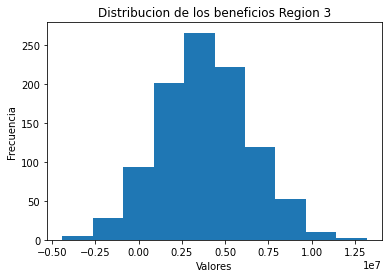

In [15]:
# Mostrar la distribucion de beneficio
plt.hist(bootstrap_means)
plt.title('Distribucion de los beneficios Region 3')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

In [16]:
rg1_riesgo_perdidas = (pd.Series(bootstrap_means)< 0).mean() * 100
print('Porcentaje de riesgo de perdidas en la region uno:', rg1_riesgo_perdidas)

Porcentaje de riesgo de perdidas en la region uno: 7.3


**OBSERVACIONES** Debido a que la region 1 tiene un porcentaje de riesgo de perdidas superior al 2.5% porciento que se nos pedia  como maximo, tendremos que descartar esta region. Ademas podemos ver que el beneficio bajo demasiado al tener ahora tan solo `180,680` dolares. Menos mal que hizimos un bootstraping y nos evitamos de haber cometido un error grande.

**Region 2**

In [17]:
# Region 2

# Conjunto de datos para usar el bootstraping
resultados_2_desc = resultados_2.sort_values(by = 'Predicciones', ascending = False)

#Bootstrapping
state = np.random.RandomState(12345)

bootstrap2_means =[]
for i in range(1_000):
    # Genera una muestra bootstrap con reemplazo usando resultados_1_desc.sample
    resultados2_sample = resultados_2_desc.sample(n= 500, replace=True, random_state = state)
    
    # tomar las top 200
    resultados2_sample = resultados2_sample.sort_values(by = 'Predicciones', ascending = False).iloc[:200]['Respuestas Correctas']
    
    #Calcula el promedio
    bootstrap2_mean = resultados2_sample.mean()
    
    # Suma
    bts2_sum = resultados2_sample.sum()
    
    # Ingreso
    ingreso2 = bts2_sum * unidad
    
    #beneficio promedio
    beneficio2_prom = ingreso2 - presupuesto
    
    bootstrap2_means.append(beneficio2_prom)
    
intervalo2_confianza_95 = np.percentile(bootstrap2_means, [2.5, 97.5])

print(f'Beneficio Promedio: {beneficio2_prom}')
print(f'Intervalo de confianza del 95%: {intervalo2_confianza_95}')

Beneficio Promedio: 4406151.931772143
Intervalo de confianza del 95%: [ 616487.14750161 8502275.29397123]


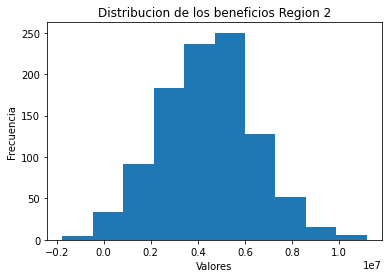

In [18]:
# Mostrar la distribucion de beneficio
plt.hist(bootstrap2_means)
plt.title('Distribucion de los beneficios Region 2')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

In [19]:
rg2_riesgo_perdidas = (pd.Series(bootstrap2_means)< 0).mean() * 100
print('Porcentaje de riesgo de perdidas en la region dos:', rg2_riesgo_perdidas)

Porcentaje de riesgo de perdidas en la region dos: 1.0999999999999999


**OBSERVACIONES** En este momento esta es la mejor region, la region numero 2 tiene un beneficio promedio de poco mas de `44 millones de dolares` y tiene un riesgo de `1.09%` el cual cumple con la condicion que se nos solicito. Todo esto tiene sentido ya que esta region poseia el error cuadratico medio menor  en comparacion al de las otras dos regiones.

**Region 3**

In [20]:
# Region 3

# Conjunto de datos para usar el bootstraping
resultados_3_desc = resultados_3.sort_values(by = 'Predicciones', ascending = False)

#Bootstrapping
state = np.random.RandomState(12345)

bootstrap3_means =[]
for i in range(1_000):
    # Genera una muestra bootstrap con reemplazo usando resultados_1_desc.sample
    resultados3_sample = resultados_3_desc.sample(n= 500, replace=True, random_state = state)
    
    # tomar las top 200
    resultados3_sample = resultados3_sample.sort_values(by = 'Predicciones', ascending = False).iloc[:200]['Respuestas Correctas']
    
    #Calcula el promedio
    bootstrap3_mean = resultados3_sample.mean()
    
    # Suma
    bts3_sum = resultados3_sample.sum()
    
    # Ingreso
    ingreso3 = bts3_sum * unidad
    
    #beneficio promedio
    beneficio3_prom = ingreso3 - presupuesto
    
    bootstrap3_means.append(beneficio3_prom)
    
intervalo3_confianza_95 = np.percentile(bootstrap3_means, [2.5, 97.5])

print(f'Beneficio Promedio: {beneficio3_prom}')
print(f'Intervalo de confianza del 95%: {intervalo3_confianza_95}')

Beneficio Promedio: 7465417.248679817
Intervalo de confianza del 95%: [-1606718.64158192  8631595.8165495 ]


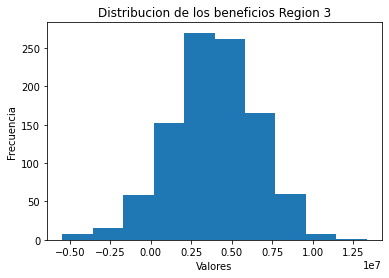

In [21]:
plt.hist(bootstrap3_means)
plt.title('Distribucion de los beneficios Region 3')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

In [22]:
rg3_riesgo_perdidas = (pd.Series(bootstrap3_means)< 0).mean() * 100
print('Porcentaje de riesgo de perdidas en la region dos:', rg3_riesgo_perdidas)

Porcentaje de riesgo de perdidas en la region dos: 7.5


**OBSERVACIONES** de la misma forma que la region 1 podemos ver que esta region, la region 3 tiene un porcentaje de riego superor al solicitado con un riesgo de `7.5%` el mas grave de todos por lo cual tendremos que descartarlo.

# 6. Conclusiones

Al realizar este proyecto descubrimos la importancia de emplear la tecnica del bootstrapping y como nos ayudo a evitar la toma de una decision erronea que hubiera llevado a grandes perdidas de dinero para la empresa. De este proyecto me gustaria destacar tres puntos.

1. La region 2 es la mejor región para el desarrollo de pozos con un riesgo de perdidas de `1.09%` y un promedio de `44 millones de dolares` de ganancia.
2. La tecnica bootstrapping nos ayudo a revelar resultados mas certeros evitando el engaño que se podia causar por los altos porcentajes de rsme en las regiones 1 y 2
3. Siempre sera mejor no dejarnos llevar por nuestros primeros calculos y tratar de llevar a cabo otros calculos que nos permitan ver las cosas mas a fondo y respaldar nuestros resultados para tomar la mejor decision posible.